# Medical Cost Personal Insurance Project

In [413]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Loading data

In [358]:
MedCostIns_ds=pd.read_csv("MedicalCostInsurance.csv")
MedCostIns_ds


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [359]:
MedCostIns_ds.shape

(1338, 7)

In this dataset we have 1338 rows and 7 columns. Here the charges column is the target variable.

In [360]:
MedCostIns_ds.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [361]:
MedCostIns_ds.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [362]:
MedCostIns_ds.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As per the datatypes, we could find that age,bmi,charges are numerical data. Sex,Children and region are categorical data.

In [363]:
MedCostIns_ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the given data. 

In [364]:
MedCostIns_ds.duplicated().sum()

1

There is one duplicate values and removing it

In [365]:
MedCostIns_ds.drop_duplicates(inplace=True)
MedCostIns_ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [366]:
MedCostIns_ds.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]>

In [367]:
MedCostIns_ds.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In the charges column , the mean is lesser than median. Hence left skewness may be present.
There is gap between 75% and max values. Hence outliers are present in the age,bmi and charges column. 



# Exploratory Data Analysis

<Axes: >

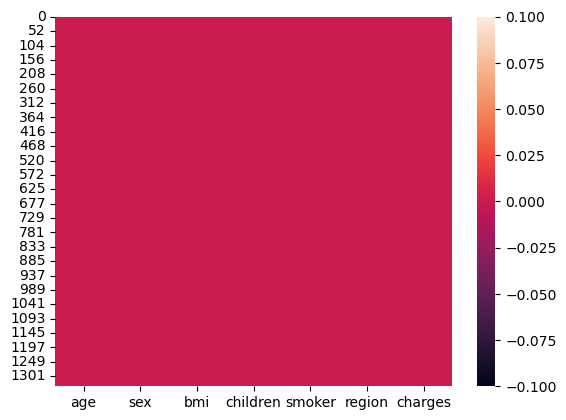

In [368]:
sns.heatmap(MedCostIns_ds.isnull())

Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

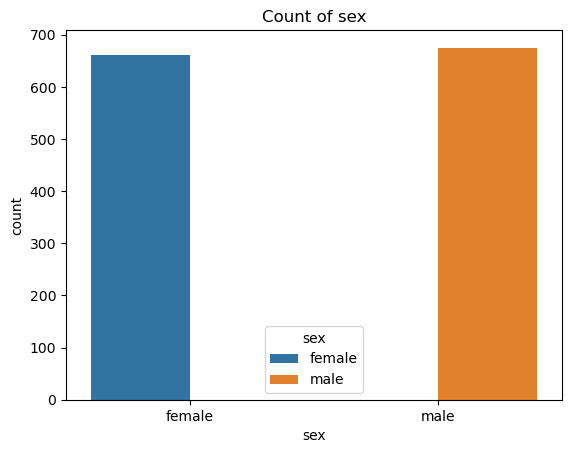

In [369]:
sns.countplot(x = 'sex', data = MedCostIns_ds,hue='sex')
plt.title('Count of sex')
plt.show

 The count of male and female are almost equal where male count is little bit higher than female. 

<function matplotlib.pyplot.show(close=None, block=None)>

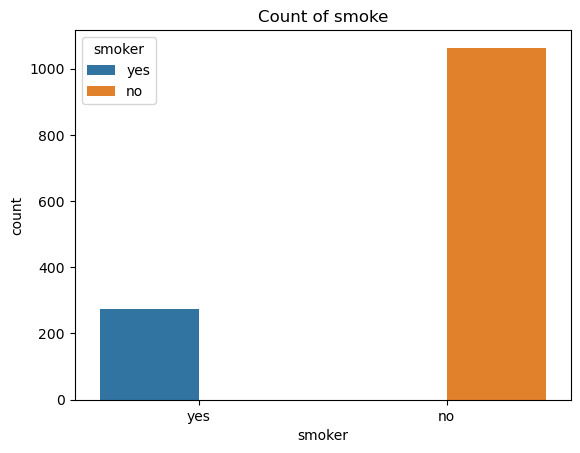

In [370]:
sns.countplot(x = 'smoker', data = MedCostIns_ds,hue='smoker')
plt.title('Count of smoke')
plt.show

The count of smokers is lesser than the count of non smokers. 

<function matplotlib.pyplot.show(close=None, block=None)>

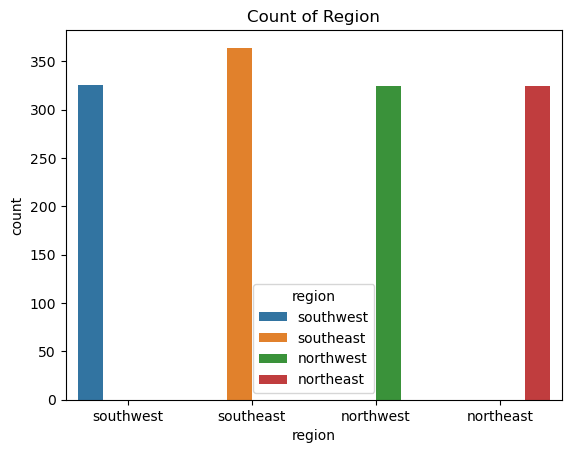

In [371]:
sns.countplot(x = 'region', data = MedCostIns_ds,hue='region')
plt.title('Count of Region')
plt.show

In this region column,

Almost all the regions have same count except the southeast region has the highest count among all.

<function matplotlib.pyplot.show(close=None, block=None)>

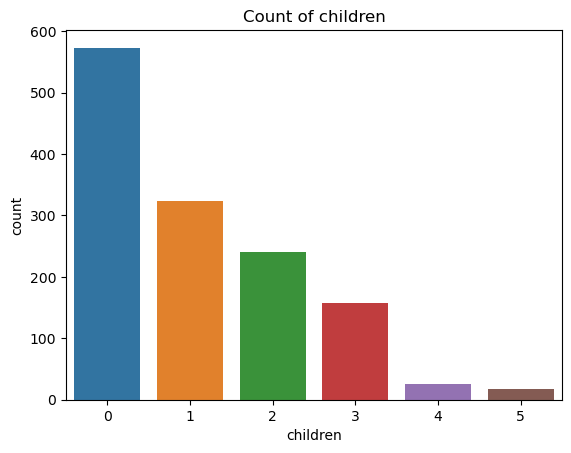

In [372]:
sns.countplot(x = 'children', data = MedCostIns_ds)
plt.title('Count of children')
plt.show

We could see that there are many people with no children amd less people having with 4 and 5 children.

People with age '20' has highest count. People with age 40 is less than other age categories. 
The age categories people are almost with count 100 to 125. 

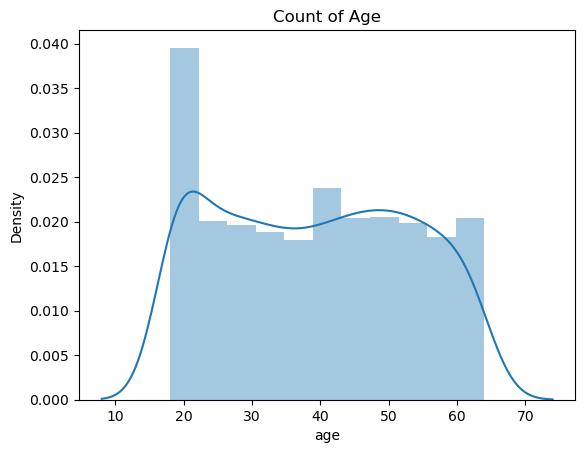

In [373]:
sns.distplot(MedCostIns_ds['age'])
plt.title('Count of Age')
plt.show()

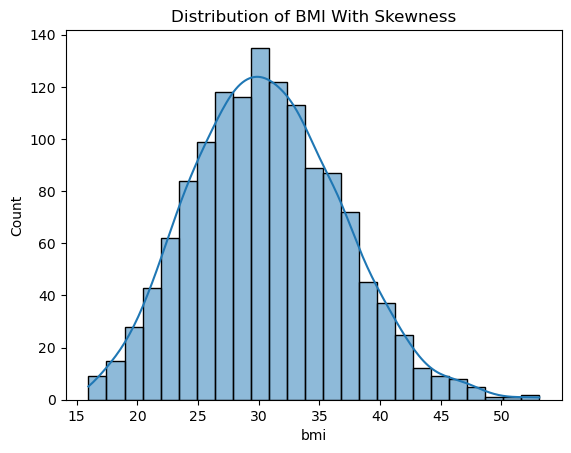

In [374]:
sns.histplot(MedCostIns_ds['bmi'],kde='True')
plt.title('Distribution of BMI With Skewness')
plt.show()

Normal BMI range is 18.5 to 24.9. But we could see that above 24.9 is overweight and  most of the people are overweight. 
Here there is a light skewness in this data

###### Plotting Outliers

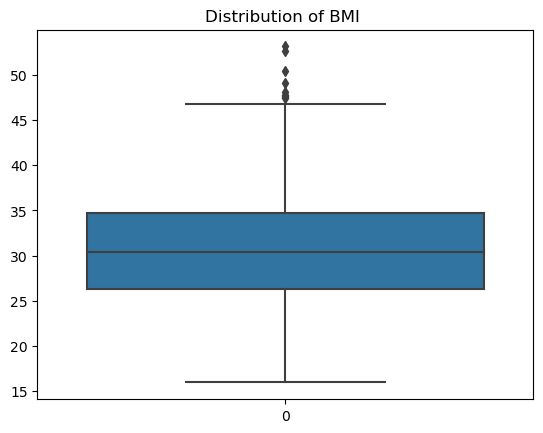

In [375]:
sns.boxplot(MedCostIns_ds['bmi'])
plt.title('Distribution of BMI ')
plt.show()

Outliers are present above the maximum value (above 46)

Text(0.5, 0, 'Smoker')

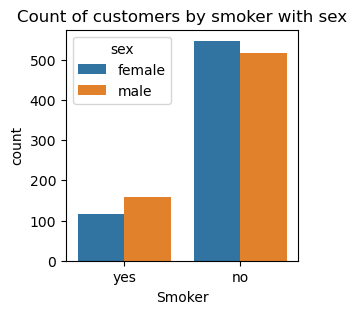

In [376]:
plt.figure(figsize=(3,3))
sns.countplot(x=MedCostIns_ds['smoker'],hue=MedCostIns_ds.sex)
plt.title('Count of customers by smoker with sex')
plt.xlabel('Smoker')


Non smokers count is high. Also when compared to female ,the male smokers are high.  

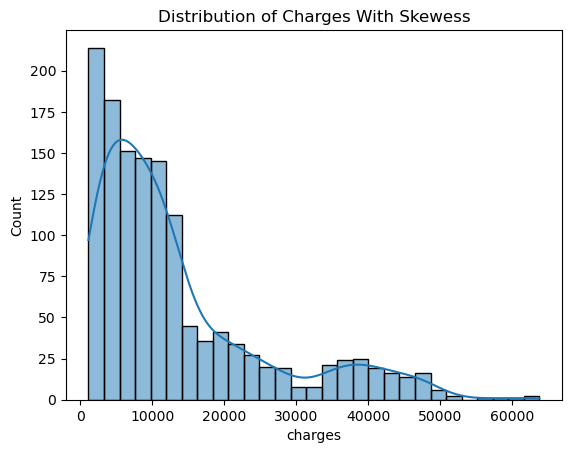

In [377]:
sns.histplot(MedCostIns_ds['charges'],kde='True')
plt.title('Distribution of Charges With Skewess')
plt.show()

Charges with 10000 to 20000 has highest count and skewness is present in the graph

Plotting Outliers

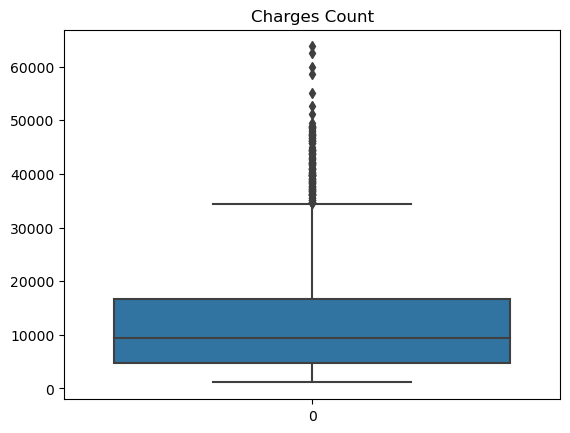

In [378]:
sns.boxplot(MedCostIns_ds['charges'])
plt.title('Charges Count')
plt.show()

Outliers are present after the maximum chargers count(35000)

age            Axes(0.125,0.53;0.065678x0.35)
bmi         Axes(0.203814,0.53;0.065678x0.35)
children    Axes(0.282627,0.53;0.065678x0.35)
charges     Axes(0.361441,0.53;0.065678x0.35)
dtype: object

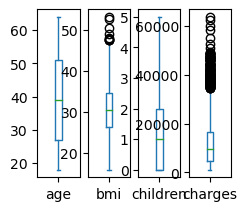

In [379]:
MedCostIns_ds.plot(kind='box',subplots=True,layout=(2,10))

Outliers are present in the bmi and charges column.

# Relationship Analysis

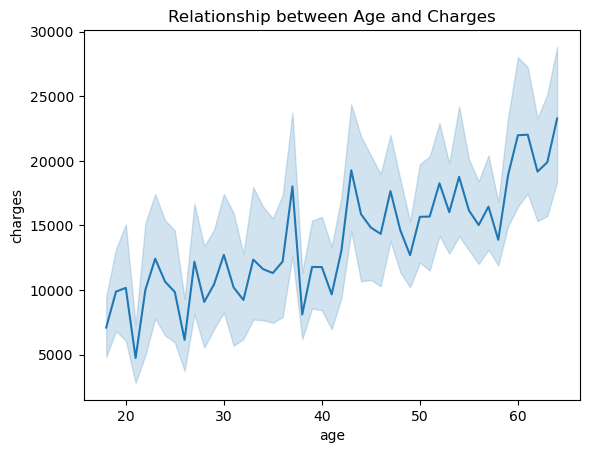

In [380]:

sns.lineplot(x=MedCostIns_ds.age,y=MedCostIns_ds.charges)
plt.title("Relationship between Age and Charges")
plt.show()


As the age increases , the charges amount also increases. 

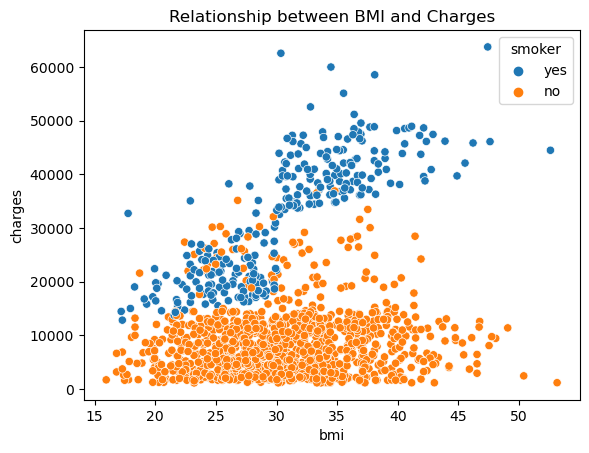

In [381]:
sns.scatterplot(x=MedCostIns_ds.bmi,y=MedCostIns_ds.charges,hue=MedCostIns_ds.smoker)
plt.title("Relationship between BMI and Charges")
plt.show()

Smokers with high BMI range are charged more than the less smokers

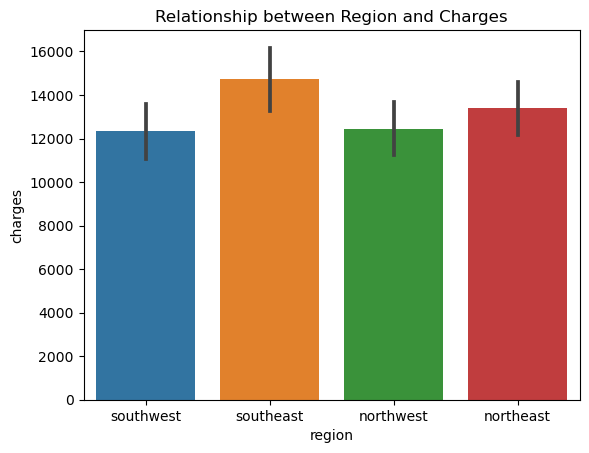

In [382]:
sns.barplot(x=MedCostIns_ds.region,y=MedCostIns_ds.charges)
plt.title("Relationship between Region and Charges")
plt.show()

Almost all the region has the same charges count except the southeast region has high charges count.

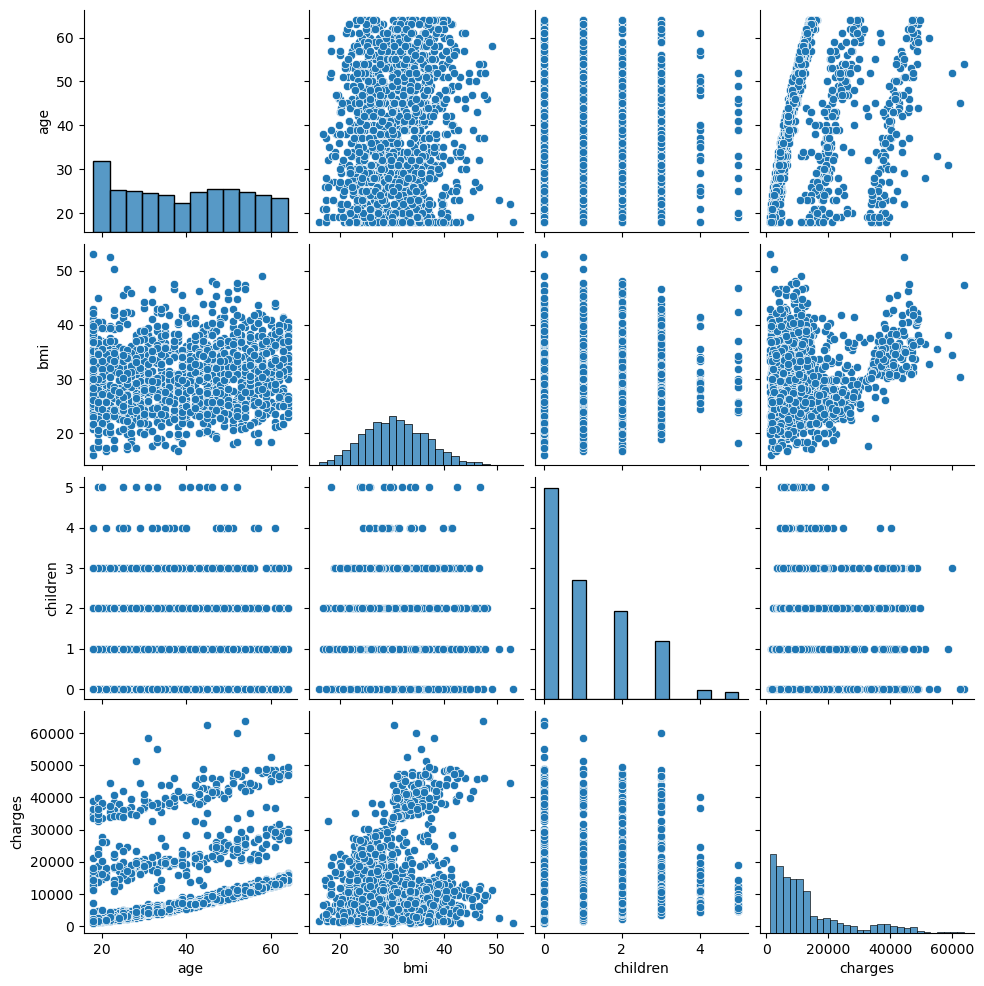

In [383]:
sns.pairplot(MedCostIns_ds)

# Data Preprocessing

In [384]:
Le=LabelEncoder()
MedCostIns_ds['sex']=Le.fit_transform(MedCostIns_ds['sex'])
MedCostIns_ds['smoker']=Le.fit_transform(MedCostIns_ds['smoker'])
MedCostIns_ds['region']=Le.fit_transform(MedCostIns_ds['region'])

 Converting the categorical data into Numerical Data

In [385]:
MedCostIns_ds

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


After converting the numerical into categorical data

In [386]:
MedCostIns_dsCorr=MedCostIns_ds.corr()
MedCostIns_dsCorr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<Axes: >

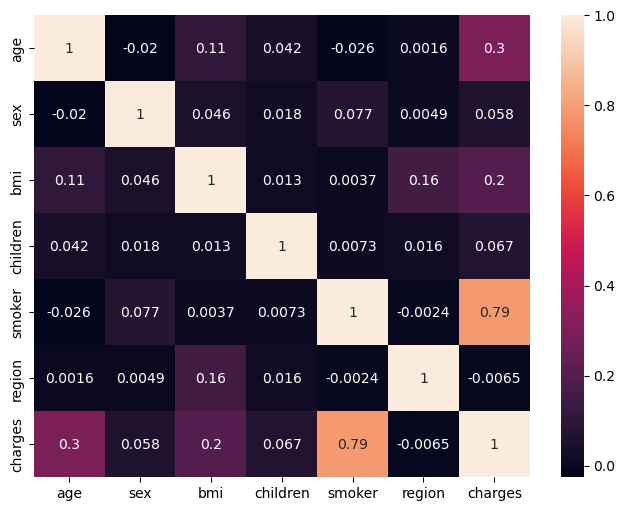

In [387]:
plt.figure(figsize=(8,6))
sns.heatmap(MedCostIns_ds.corr(), annot=True)

Observations:
High correlation between smokers and charges column and viceversa.
Also there is a correlation between age and charges column and viceversa.

In [388]:
MedCostIns_ds.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


There is a gap between 75% and max value in the bmi,charges. Hence outliers are present in the bmi,charges column.
Also mean is greater than median sex,bmi,smoker and charges column and hence left skewness present

#### Removing Skewness

In [389]:
from scipy.stats import boxcox
MedCostIns_ds['bmi']=boxcox(MedCostIns_ds['bmi'],0)


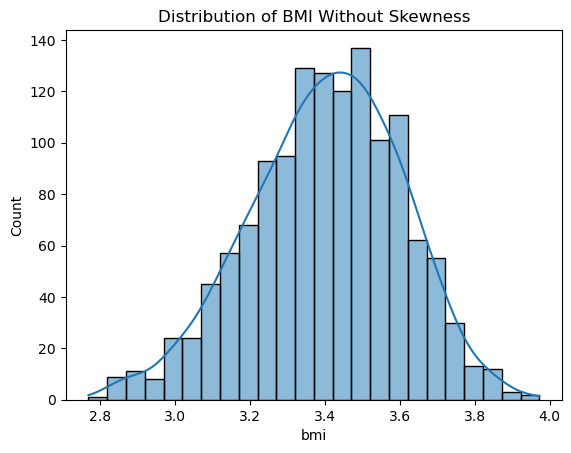

In [390]:
sns.histplot(MedCostIns_ds['bmi'],kde='True')
plt.title('Distribution of BMI Without Skewness')
plt.show()

Skewness is removed and now the graph is uniformly distributed.

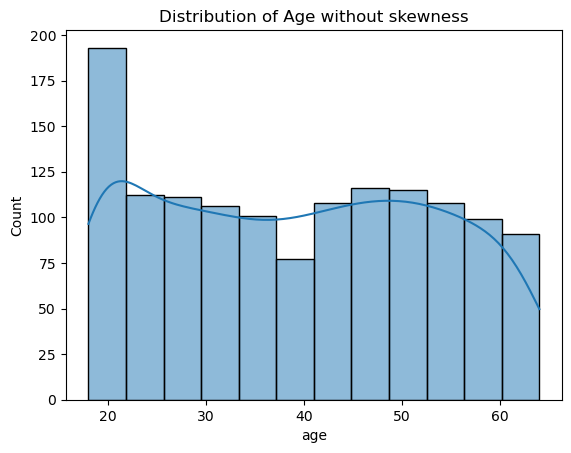

In [391]:
sns.histplot(MedCostIns_ds['age'],kde='True')
plt.title('Distribution of Age without skewness')
plt.show()

### Removing Outliers

In [392]:
MedCostIns_ds.loc[MedCostIns_ds['bmi'] > 46, 'bmi'] = 30.4

In [393]:
MedCostIns_ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,3.328627,0,1,3,16884.92400
1,18,1,3.519573,1,0,2,1725.55230
2,28,1,3.496508,3,0,2,4449.46200
3,33,1,3.122585,0,0,1,21984.47061
4,32,1,3.363149,0,0,1,3866.85520


# Splitting the data

In [394]:
x=MedCostIns_ds.iloc[:,0:-1]
x.shape
x

,age,sex,bmi,children,smoker,region
0,19,0,3.328627,0,1,3
1,18,1,3.519573,1,0,2
2,28,1,3.496508,3,0,2
3,33,1,3.122585,0,0,1
4,32,1,3.363149,0,0,1
...,...,...,...,...,...,...
1333,50,1,3.433019,3,0,1
1334,18,0,3.463233,0,0,0
1335,18,0,3.606856,0,0,2
1336,21,0,3.250374,0,0,3


In [395]:
y=MedCostIns_ds.iloc[:,-1]

In [396]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [421]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)

In [422]:
x_train.shape

(935, 6)

In [423]:
x_test.shape

(402, 6)

In [424]:
y_train.shape

(935,)

In [425]:
y_test.shape

(402,)

## Model Selection with Linear Regression.

In [440]:
lr=LinearRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, prediction))
print(np.sqrt(mean_squared_error(y_test, prediction)))
r2_score_linear = r2_score(y_test, prediction)

print(r2_score(y_test, prediction))

5967.438322466668
0.769125459663099


In [445]:
input_data = (32, 1,28.8, 0, 0, 1) #age-32,sex-1,bmi-28.8,children-0,smoker-1,region-1
array_data = np.asarray(input_data)
array_data_reshaped = array_data.reshape(1,-1)
pred= lr.predict(array_data_reshaped)

print('The predicted insurance charge is $',pred)


The predicted insurance charge is $ [269968.20529351]


## Model Selection with Random Forest Regressor.

In [437]:
rfr = RandomForestRegressor(max_depth=50,  min_samples_leaf=20,min_samples_split=5,
                      n_estimators=1000)
rfr.fit(x_train, y_train)
pred_random = rfr.predict(x_test)
rmse_random =np.sqrt(mean_squared_error(y_test, pred_random))
print(np.sqrt(mean_squared_error(y_test, pred_random)))
r2_score_random = r2_score(y_test, pred_random)
print(r2_score(y_test, pred_random))

4487.631651826973
0.8694326556877625


In [438]:
input_data = (38, 1,28.8, 0, 0, 1) #age-32,sex-1,bmi-28.8,children-0,smoker-1,region-1
array_data = np.asarray(input_data)
array_data_reshaped = array_data.reshape(1,-1)
prediction = rfr.predict(array_data_reshaped)

print('The predicted insurance charge is $',prediction)

The predicted insurance charge is $ [7740.13980788]


In [ ]:
MedCostIns_ds=pd.DataFrame(prediction)
MedCostIns_ds.to_csv("Medical_cost_Insurance.csv")

Cross validation with linear Regression

In [442]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76085251 0.71268909 0.77601216 0.73372215 0.75577677]
0.7478105386953317
0.02218505987537724


Cross validation with Random Forest Agressor

In [444]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88201806 0.80254777 0.89126398 0.84449907 0.87203752]
0.8584732811993836
0.0320515748074699


## The Model with Random Forest Regressor  is working fine with highest r2 score